In [1]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from rake_nltk import Rake
import torch
from collections import Counter
import itertools
from collections import defaultdict
from wordcloud import WordCloud
import pandas as pd
import nltk

d:\Process\envs\face\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('climate_nasa.csv')
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [3]:
df.shape

(522, 5)

In [4]:
df.columns

Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')

In [5]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

d:\Process\envs\face\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


RoBERTa

In [6]:
def sentiment_analysis(text):
    if isinstance(text, str):
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        outputs = model(**inputs)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=1)
        return predictions.detach().numpy()[0]
    else:
        return [0, 0, 0]

In [7]:
def sentimental_label(sentiment_array):
    labels = ['negative', 'neutral', 'positive']
    max_index = np.argmax(sentiment_array)
    return labels[max_index]

YAKE (Yet Another Keyword Extractor)

In [8]:
import yake # type: ignore

# Define a keyword extraction model with default parameters
kw_extractor = yake.KeywordExtractor()

# Define a function to extract keywords using YAKE!
def extract_keywords_yake(text):
    keywords = kw_extractor.extract_keywords(text)
    return [kw[0] for kw in keywords]

ETL

In [9]:
df['sentiment'] = df['text'].apply(sentiment_analysis)

In [10]:
df['label'] = df['sentiment'].apply(lambda x: sentimental_label(x))

In [11]:
df['keywords'] = df['text'].apply(extract_keywords_yake)

Warning! Exception: object of type 'float' has no len() generated by the following text: 'nan' 
Warning! Exception: object of type 'float' has no len() generated by the following text: 'nan' 
Warning! Exception: object of type 'float' has no len() generated by the following text: 'nan' 
Warning! Exception: object of type 'float' has no len() generated by the following text: 'nan' 
Warning! Exception: object of type 'float' has no len() generated by the following text: 'nan' 
Warning! Exception: object of type 'float' has no len() generated by the following text: 'nan' 
Warning! Exception: object of type 'float' has no len() generated by the following text: 'nan' 
Warning! Exception: object of type 'float' has no len() generated by the following text: 'nan' 
Warning! Exception: object of type 'float' has no len() generated by the following text: 'nan' 
Warning! Exception: object of type 'float' has no len() generated by the following text: 'nan' 
Warning! Exception: object of type 'floa

Graphs

C:\Users\DEERAJ\AppData\Local\Temp\ipykernel_19992\1102665885.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positive_count = df[df['label'] == 'positive'].count()[0]
C:\Users\DEERAJ\AppData\Local\Temp\ipykernel_19992\1102665885.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neutral_count = df[df['label'] == 'neutral'].count()[0]
C:\Users\DEERAJ\AppData\Local\Temp\ipykernel_19992\1102665885.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

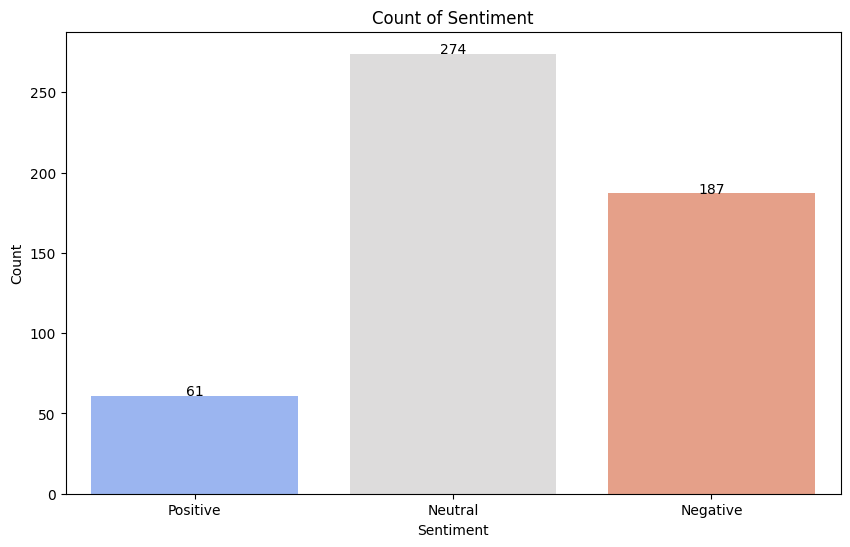

In [12]:
positive_count = df[df['label'] == 'positive'].count()[0]
neutral_count = df[df['label'] == 'neutral'].count()[0]
negative_count = df[df['label'] == 'negative'].count()[0]

labels = ['Positive', 'Neutral', 'Negative']
counts = [positive_count, neutral_count, negative_count]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=labels, y=counts, palette='coolwarm')

for index, value in enumerate(counts):
    plt.text(index, value, f'{value}', color='black', ha="center")

plt.title('Count of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

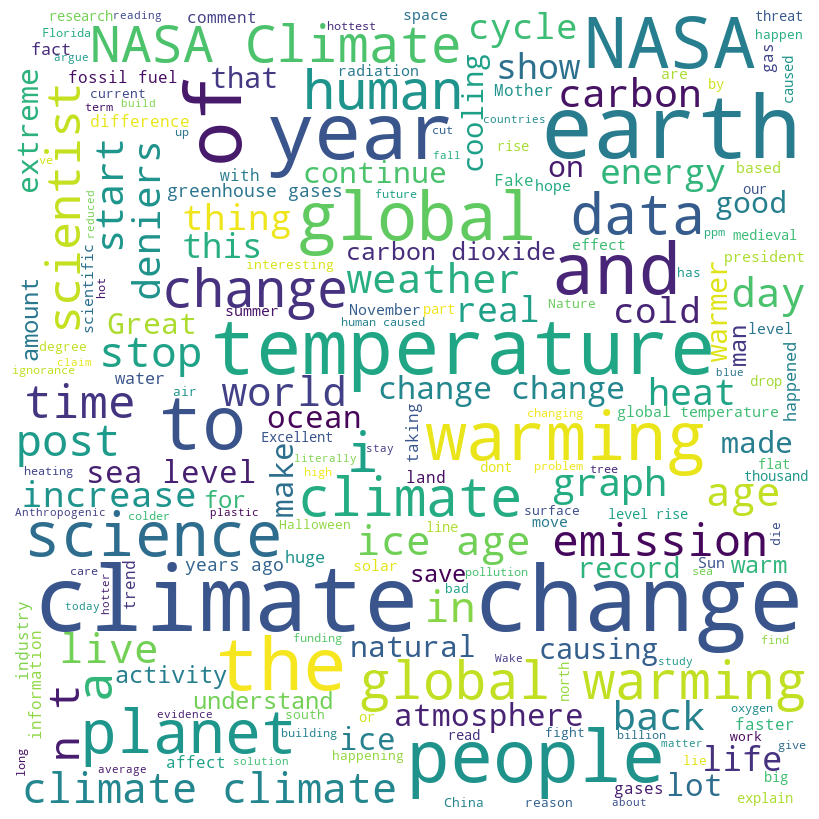

In [13]:
all_keywords = ' '.join([' '.join(keywords) for keywords in df['keywords'] if isinstance(keywords, list)])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(),
                min_font_size = 10).generate(all_keywords)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

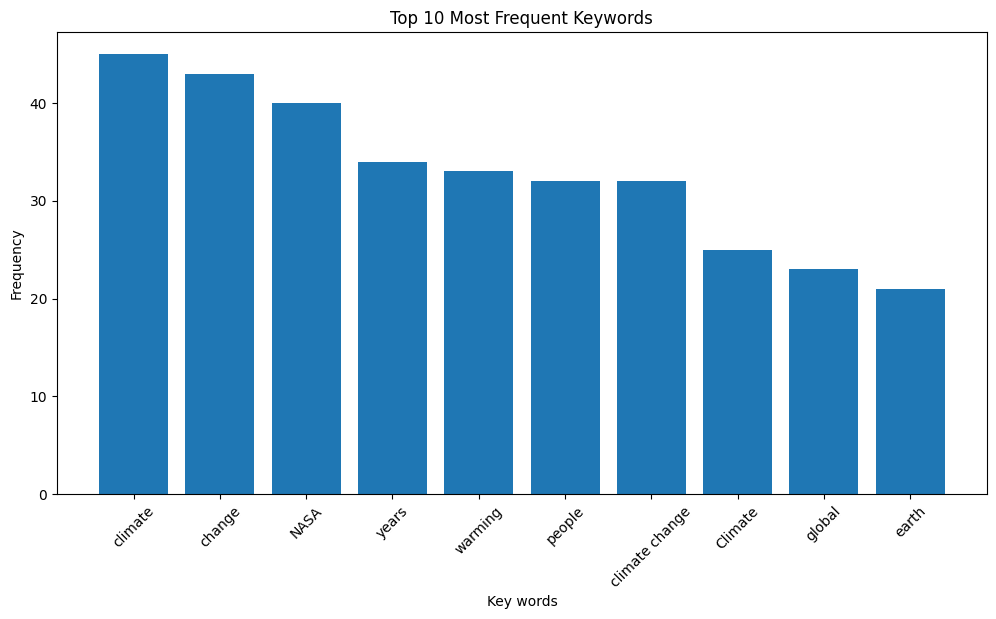

In [14]:
all_keywords = list(itertools.chain.from_iterable(df['keywords']))

keyword_counts = Counter(all_keywords)

most_common_keywords = keyword_counts.most_common(10)
words, counts = zip(*most_common_keywords)

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel('Key words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Keywords')
plt.xticks(rotation=45)
plt.show()